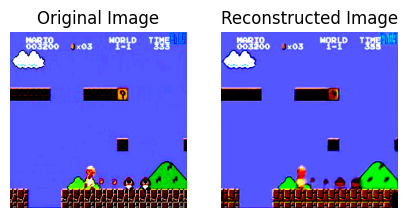

In [1]:
import torch
from src.autoencoder import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
myvae = vae().to(device)
myvae.load_state_dict(torch.load('weights/simplevae_weights.pth'))
dataset = torch.load('weights/dataset.pth')
sample_image(myvae, dataset, 0)

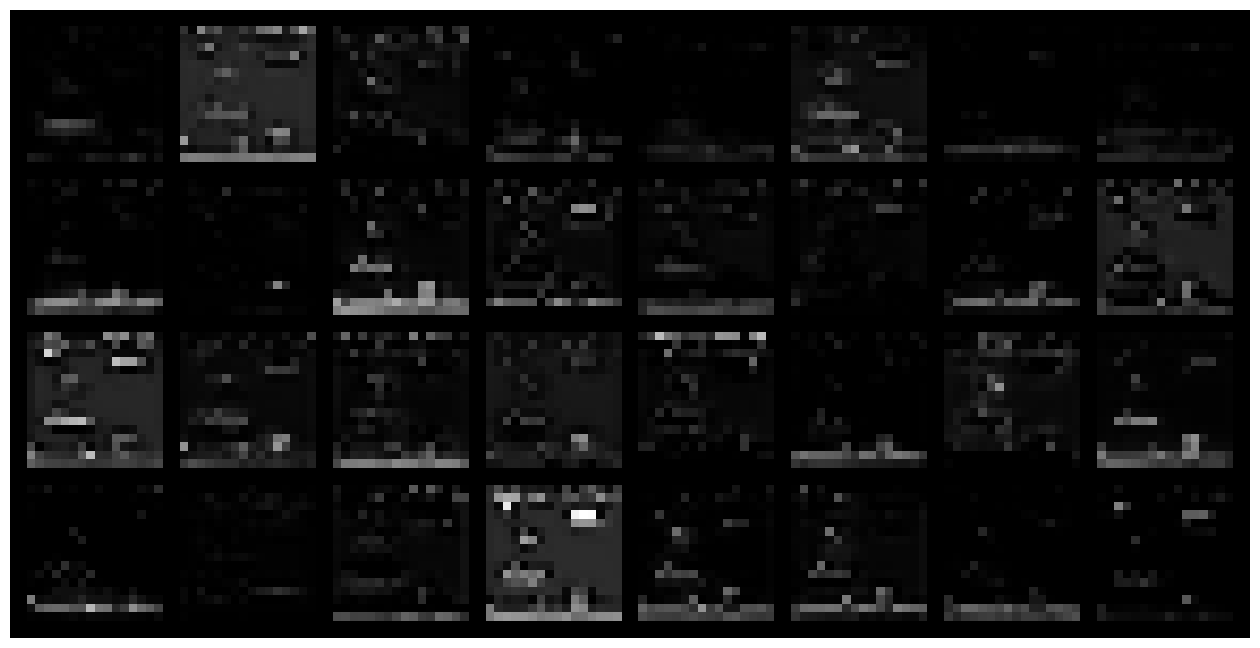

In [31]:
import torch
import matplotlib.pyplot as plt
import torchvision.utils as vutils

def visualize_latent_tensor(latent_tensor):
    """
    Visualizes a latent tensor of shape (1, 32, 16, 16)
    by plotting all 32 channels as a grid of images.
    """
    if latent_tensor.shape != (1, 32, 16, 16):
        raise ValueError("Expected tensor shape (1, 32, 16, 16), but got {}".format(latent_tensor.shape))

    # Remove the batch dimension (1)
    latent_tensor = latent_tensor.squeeze(0)  # Shape: (32, 16, 16)

    # Normalize the tensor to [0, 1] for visualization
    latent_tensor = (latent_tensor - latent_tensor.min()) / (latent_tensor.max() - latent_tensor.min())

    # Create a grid of images (8 rows by 4 columns for 32 channels)
    grid = vutils.make_grid(latent_tensor.unsqueeze(1), nrow=8, normalize=False, padding=2)

    # Plot the grid
    plt.figure(figsize=(16, 16))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())  # Change to HWC for plt
    plt.axis('off')
    plt.show()

# Example usage:
img = dataset[30].to(device)
latent = myvae.encode(img)

latent_tensor = latent.cpu()  # Example latent tensor
visualize_latent_tensor(latent_tensor)
